In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
red_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [3]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_df.groupby('quality')['quality'].count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

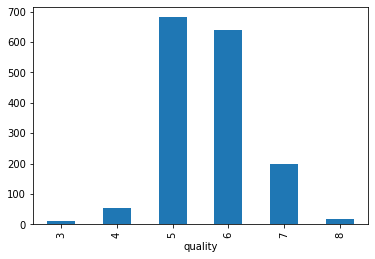

In [5]:
red_df.groupby('quality')['quality'].count().plot(kind='bar')

In [6]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
red_df.corr().style.background_gradient(cmap='RdYlGn')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


/Users/frank/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


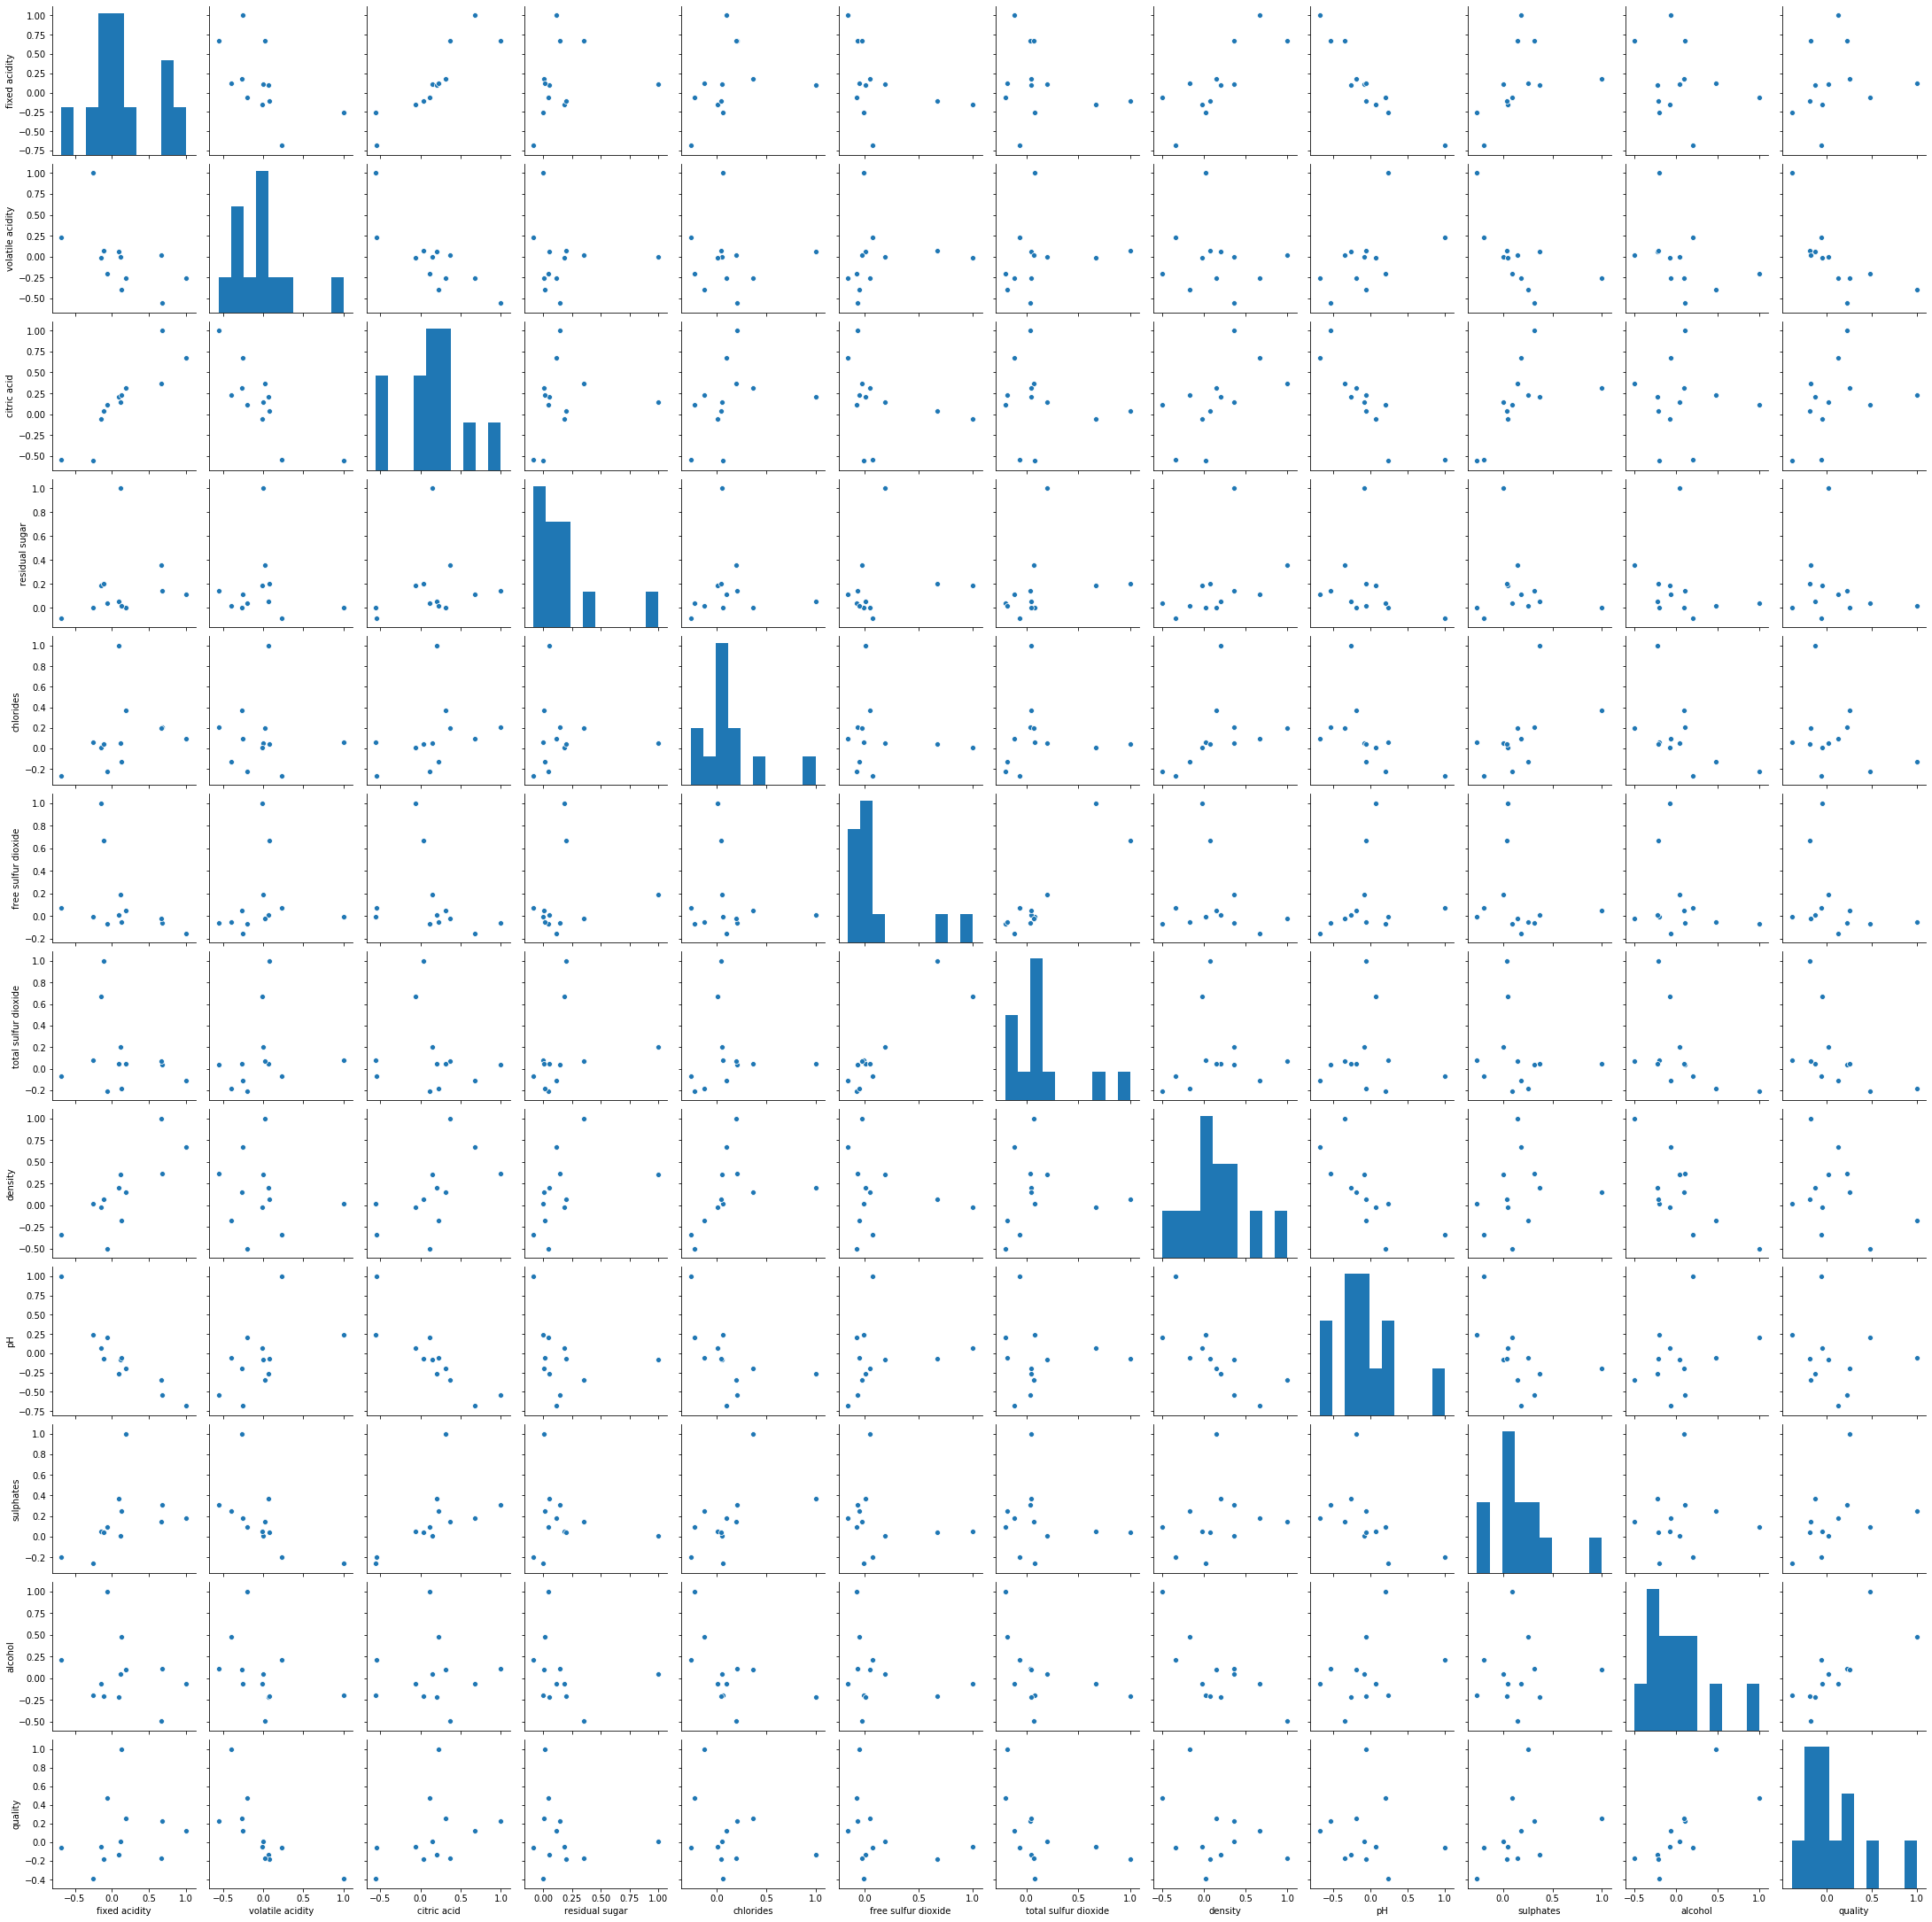

In [8]:
import seaborn as sns
sns.pairplot(red_df.corr())
plt.show()

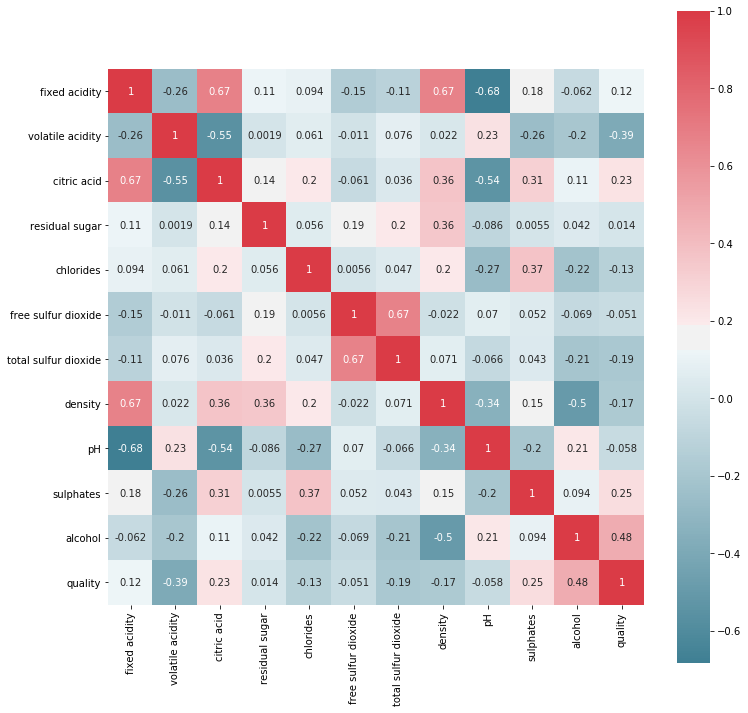

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(red_df.corr(), mask=np.zeros_like(red_df.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True,annot=True)
plt.show()
#如果出現TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.
#seaborn與numpy版本不相符
#解決方法：升級seaborn至0.9.1以上
#pip install seaborn==0.10.0

In [10]:
red_df.corr().loc['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

線性迴歸需要相關性強的特徵(不論正負)

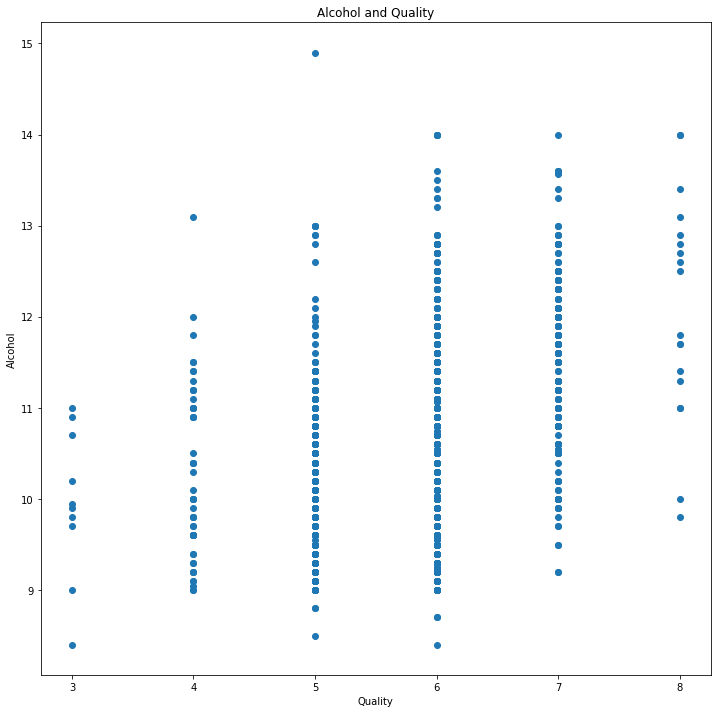

In [11]:
plt.figure(figsize=(12,12))
plt.scatter(red_df['quality'],red_df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Alcohol and Quality')
plt.show()

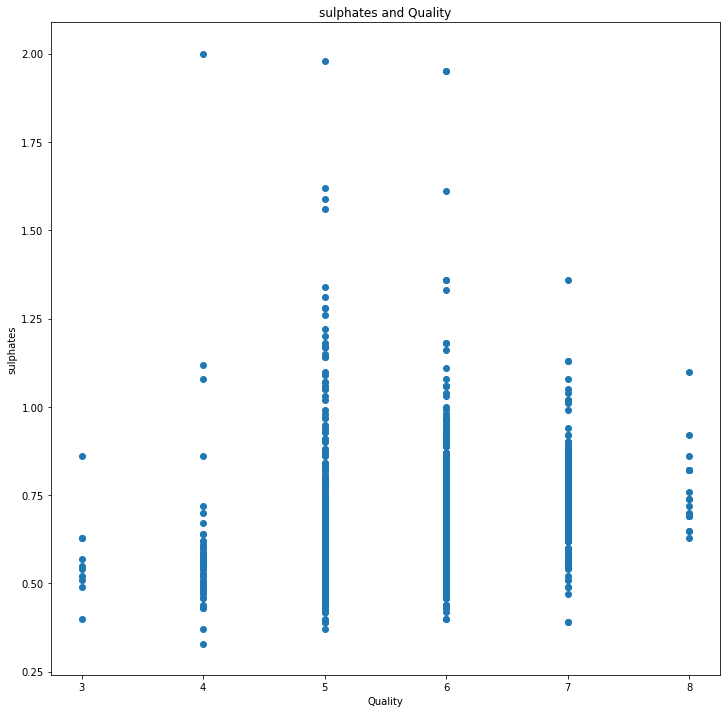

In [12]:
plt.figure(figsize=(12,12))
plt.scatter(red_df['quality'],red_df['sulphates'])
plt.xlabel('Quality')
plt.ylabel('sulphates')  #亞硫酸鹽
plt.title('sulphates and Quality')
plt.show()

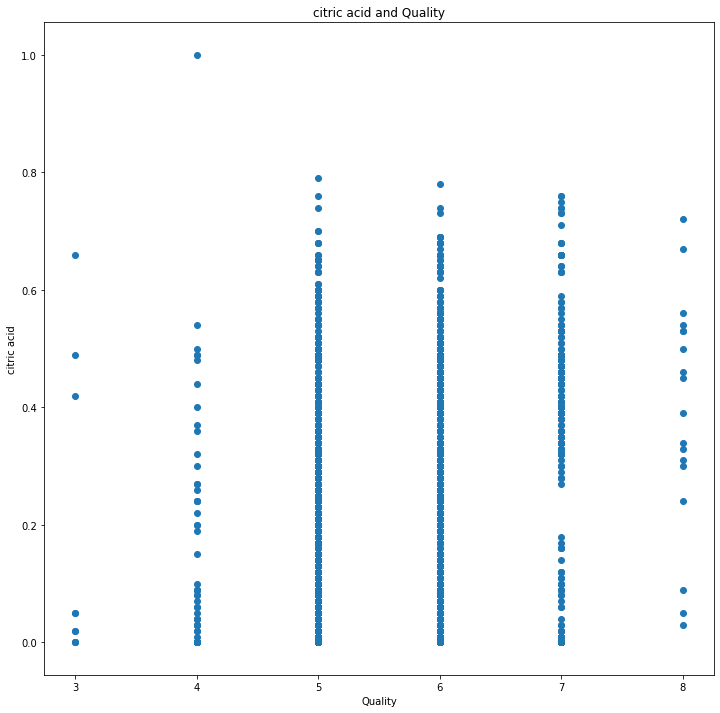

In [13]:
plt.figure(figsize=(12,12))
plt.scatter(red_df['quality'],red_df['citric acid'])
plt.xlabel('Quality')
plt.ylabel('citric acid')  #檸檬酸
plt.title('citric acid and Quality')
plt.show()

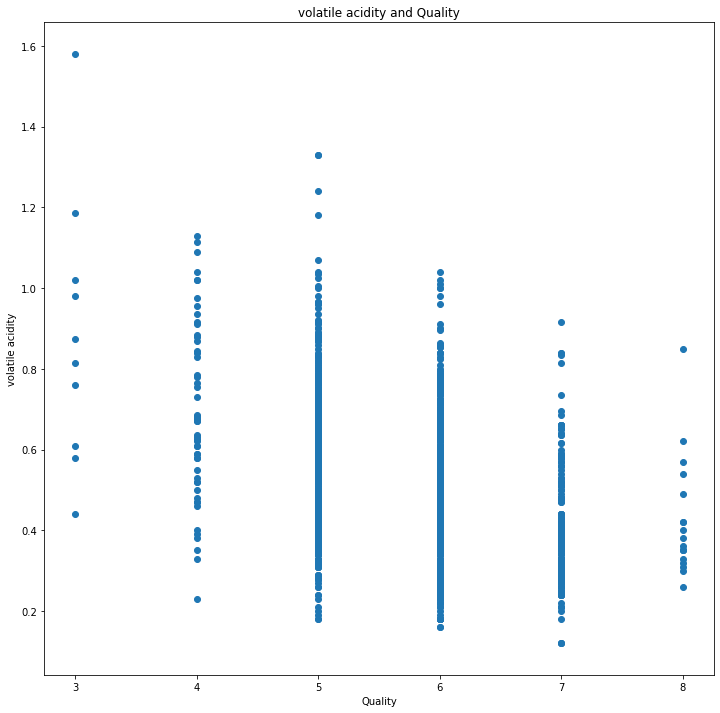

In [14]:
plt.figure(figsize=(12,12))
plt.scatter(red_df['quality'],red_df['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('volatile acidity') #揮發酸度
plt.title('volatile acidity and Quality')
plt.show()

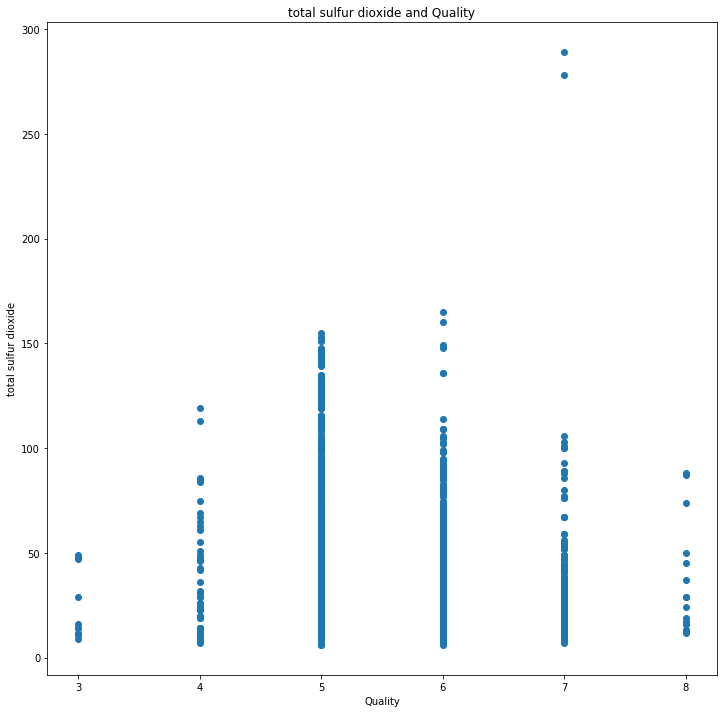

In [15]:
plt.figure(figsize=(12,12))
plt.scatter(red_df['quality'],red_df['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('total sulfur dioxide')  #二氧化硫,用來避免細菌與氧化反應,可藉由醒酒方式所產生的臭雞蛋味
plt.title('total sulfur dioxide and Quality')
plt.show()

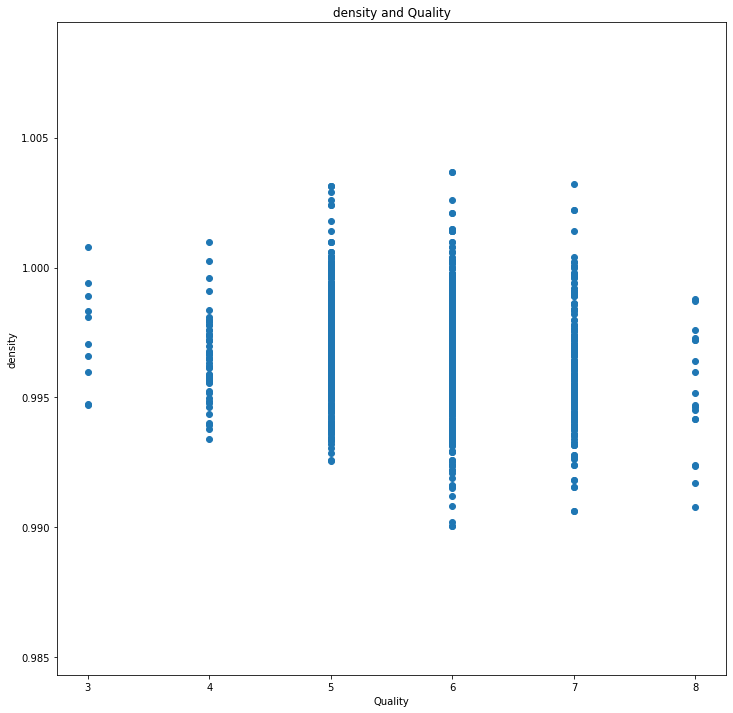

In [16]:
plt.figure(figsize=(12,12))
plt.scatter(red_df['quality'],red_df['density'])
plt.xlabel('Quality')
plt.ylabel('density')
plt.title('density and Quality')
plt.show()

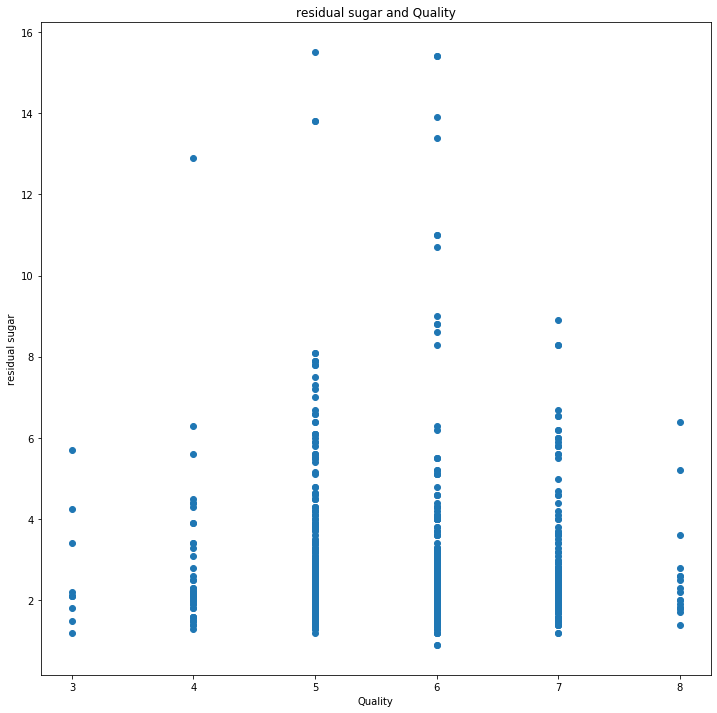

In [17]:
plt.figure(figsize=(12,12))
plt.scatter(red_df['quality'],red_df['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('residual sugar')  #剩餘糖分
plt.title('residual sugar and Quality')
plt.show()

In [18]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
red_df_noquality=red_df.drop("quality", axis=1)
X = red_df_noquality.values 
y = red_df['quality'].values
lr.fit(X, y) 
lr.score(X, y)

0.36055170303868855

In [19]:
print(pd.DataFrame({"Name":red_df_noquality.columns,"Coefficients":lr.coef_}).sort_values(by='Coefficients'))

                    Name  Coefficients
7                density    -17.881164
4              chlorides     -1.874225
1       volatile acidity     -1.083590
8                     pH     -0.413653
2            citric acid     -0.182564
6   total sulfur dioxide     -0.003265
5    free sulfur dioxide      0.004361
3         residual sugar      0.016331
0          fixed acidity      0.024991
10               alcohol      0.276198
9              sulphates      0.916334


In [20]:
print(lr.intercept_)

21.965208449451552


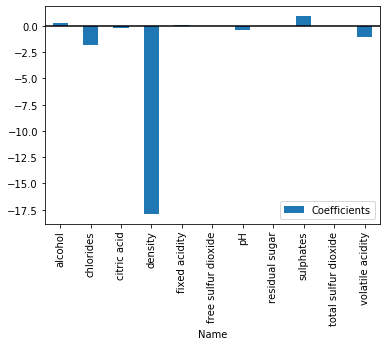

In [21]:
wine_coef = pd.DataFrame({"Name":red_df_noquality.columns,"Coefficients":lr.coef_})
wine_coef_group = wine_coef.groupby('Name')
wine_coef_sum = wine_coef_group.sum()
wine_plot = wine_coef_sum.plot(kind='bar')
ax = plt.axhline(y=0,color='black')
plt.show()

In [22]:
import numpy as np
from sklearn.preprocessing import Normalizer
red_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
red_df_noquality = red_df.drop("quality", axis=1)
Y = red_df['quality'].values
wine2_normal = Normalizer().fit_transform(red_df_noquality)
X = wine2_normal
lr.fit(X, Y)
lr.score(X, Y)

0.35980751054909743

In [23]:
print(pd.DataFrame({"Name":red_df_noquality.columns,"Coefficients":lr.coef_}).sort_values(by='Coefficients'))

                    Name  Coefficients
4              chlorides    -43.464794
7                density    -36.611490
1       volatile acidity    -35.112987
8                     pH    -19.775950
2            citric acid    -13.819478
3         residual sugar      0.517508
0          fixed acidity      1.581079
5    free sulfur dioxide      1.612678
6   total sulfur dioxide      2.346113
10               alcohol     10.565652
9              sulphates     40.458696


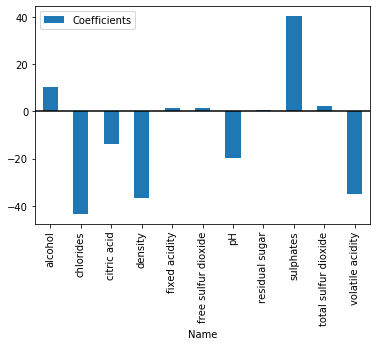

In [24]:
wine_coef = pd.DataFrame({"Name":red_df_noquality.columns,"Coefficients":lr.coef_})
wine_coef_group = wine_coef.groupby('Name')
wine_coef_sum = wine_coef_group.sum()
wine_plot = wine_coef_sum.plot(kind='bar')
ax = plt.axhline(y=0,color='black')
plt.show()

In [25]:
red_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [26]:
lr_ridge = linear_model.Ridge (alpha = .5)
red_df_noquality = red_df.drop("quality", axis=1)
X = red_df_noquality.values 
Y = red_df['quality'].values
lr_ridge.fit(X, Y) 
lr_ridge.score(X, Y)

0.3600080990560508

In [27]:
lr_lasso = linear_model.Lasso(alpha = 0.01)
lr_lasso.fit(X, Y) 
lr_lasso.score(X, Y)

0.33908790020160606

In [28]:
#使用多項式迴歸分析，希望能夠更擬合訓練資料
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

lr = linear_model.LinearRegression()
lr_p4 = make_pipeline(PolynomialFeatures(4),lr)
lr_p4.fit(X, Y)
lr_p4.score(X, Y)

0.92133118058382

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=123)

In [30]:
print(X_train.shape,X_test.shape)

(1439, 11) (160, 11)


In [31]:
lr = linear_model.LinearRegression()
lr_p4 = make_pipeline(PolynomialFeatures(4),lr)
lr_p4.fit(X_train, Y_train)
print('訓練集正確性:{0:.3f},測試集正確性:{1:.3f}'.format(lr_p4.score(X_train,Y_train),lr_p4.score(X_test,Y_test)))

訓練集正確性:0.982,測試集正確性:-4805.703


In [32]:
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train) 
print('訓練集正確性:{0:.3f},測試集正確性:{1:.3f}'.format(lr.score(X_train,Y_train),lr.score(X_test,Y_test)))

訓練集正確性:0.354,測試集正確性:0.407
